In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt


def get_traces_from_directory(path):
    file_names = [f for f in listdir(path) if isfile(join(path, f))]

    trace_df = []

    for f in file_names:
        df = pd.read_csv(path + f)
        trace_df += [df]

    traces = pd.concat(trace_df, axis=0, ignore_index=True)
    return traces


In [2]:
def get_call_graph_data():
    df_calls = pd.DataFrame(columns=['um', 'dm', 'count', 'avgRT'])
    for i in range(145):
        df = pd.read_csv('data/MSCallGraph/MSCallGraph_' + str(i) + '.csv')

        ums_gp = df[df['rt'] >= 0].groupby('um')
        ums_dms_gp = df[df['rt'] >= 0].groupby(['um', 'dm'])
        transitions = []
        for key, item in ums_dms_gp:
            calls_count = len(ums_dms_gp.get_group(key))
            sum_rt = ums_dms_gp.get_group(key)['rt'].sum()
            cond = (df_calls['um'] == key[0]) & (df_calls['dm'] == key[1])
            result = df_calls.loc[(df_calls['um'] == key[0]) & (df_calls['dm'] == key[1])]
            if len(result) == 0:
                new_row = {'um': key[0], 'dm': key[1], 'count': calls_count, 'avgRT':sum_rt / calls_count}
                df_calls = df_calls.append(new_row, ignore_index=True)
            else:
                df_calls.loc[cond, 'avgRT'] = (result.iloc[0]['count'] * result.iloc[0]['avgRT'] + sum_rt) / (calls_count + result.iloc[0]['count'])
                df_calls.loc[cond, 'count'] += calls_count
    return df_calls

In [3]:
def get_call_graph_data_with_interface():
    df_calls_interface = pd.DataFrame(columns=['um', 'dm', 'interface', 'count', 'avgRT'])
    for i in range(145):
        df = pd.read_csv('data/MSCallGraph/MSCallGraph_' + str(i) + '.csv')

        ums_gp = df[df['rt'] >= 0].groupby('um')
        ums_dms_gp = df[df['rt'] >= 0].groupby(['um', 'dm', 'interface'])
        transitions = []
        for key, item in ums_dms_gp:
            calls_count = len(ums_dms_gp.get_group(key))
            sum_rt = ums_dms_gp.get_group(key)['rt'].sum()
            cond = (df_calls_interface['um'] == key[0]) & (df_calls_interface['dm'] == key[1]) & (df_calls_interface['interface'] == key[2])
            result = df_calls_interface.loc[cond]
            if len(result) == 0:
                new_row = {'um': key[0], 'dm': key[1], 'interface': key[2], 'count': calls_count, 'avgRT':sum_rt / calls_count}
                df_calls_interface = df_calls_interface.append(new_row, ignore_index=True)
            else:
                df_calls_interface.loc[cond, 'avgRT'] = (result.iloc[0]['count'] * result.iloc[0]['avgRT'] + sum_rt) / (calls_count + result.iloc[0]['count'])
                df_calls_interface.loc[cond, 'count'] += calls_count
    return df_calls_interface

In [245]:
df_calls = get_call_graph_data()
df_calls.to_csv('output/calls_data.csv')

In [4]:
df_calls = pd.read_csv('output/calls_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'output/calls_data.csv'

(0.0, 1.0458827659458012)

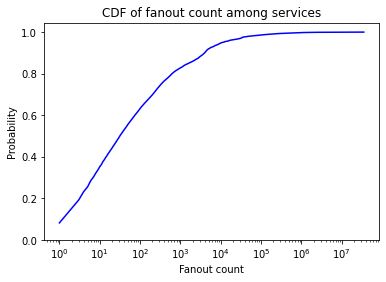

In [311]:
xs = sorted(df_calls['count'])
unique, counts = np.unique(xs, return_counts=True)
pdf = [c / len(xs) for c in counts]
cdf = [x for x in np.cumsum(pdf)]

plt.plot(unique, cdf, color="blue", label='')
plt.xlabel('Fanout count')
plt.ylabel('Probability')
plt.title('CDF of fanout count among services')
plt.xscale('log')
# plt.xlim(0)
plt.ylim(0)

(0.0, 1.0465452679709089)

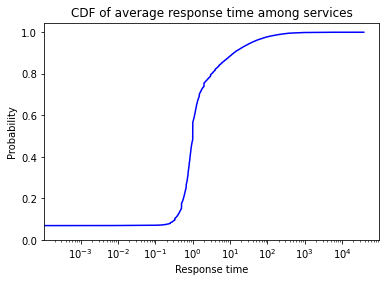

In [312]:
xs = sorted(df_calls['avgRT'])
unique, counts = np.unique(xs, return_counts=True)
pdf = [c / len(xs) for c in counts]
cdf = [x for x in np.cumsum(pdf)]

plt.plot(unique, cdf, color="blue", label='')
plt.xlabel('Response time')
plt.ylabel('Probability')
plt.title('CDF of average response time among services')
plt.xscale('log')
# plt.xlim(0)
plt.ylim(0)

In [313]:
calls_group_um = df_calls.groupby('um')['count'].sum()
call_probability = [row['count'] / calls_group_um[row['um']] for index, row in df_calls.iterrows()]
df_calls['probability'] = call_probability


(0.0, 1.0499945991678405)

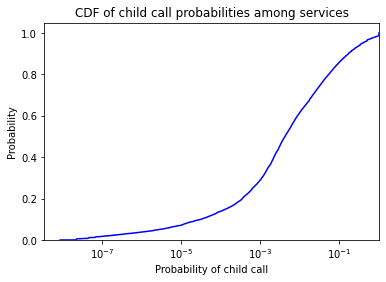

In [314]:
xs = sorted(df_calls['probability'])
unique, counts = np.unique(xs, return_counts=True)
pdf = [c / len(xs) for c in counts]
cdf = [x for x in np.cumsum(pdf)]

plt.plot(unique, cdf, color="blue", label='')
plt.xlabel('Probability of child call')
plt.ylabel('Probability')
plt.title('CDF of child call probabilities among services')
plt.xscale('log')
plt.xlim(right=1)
plt.ylim(0)

In [261]:
df_calls_interface = get_call_graph_data_with_interface()
df_calls_interface.to_csv('output/calls_data_interface.csv')

In [315]:
df_calls_interface = pd.read_csv('output/calls_data_interface.csv')

(0.0, 1.041340909739775)

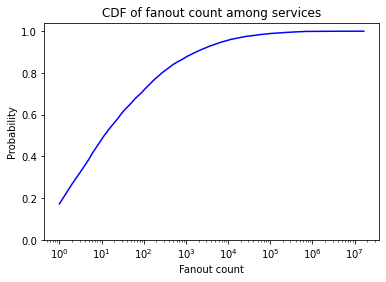

In [316]:
xs = sorted(df_calls_interface['count'])
unique, counts = np.unique(xs, return_counts=True)
pdf = [c / len(xs) for c in counts]
cdf = [x for x in np.cumsum(pdf)]

plt.plot(unique, cdf, color="blue", label='')
plt.xlabel('Fanout count')
plt.ylabel('Probability')
plt.title('CDF of fanout count among services')
plt.xscale('log')
# plt.xlim(0)
plt.ylim(0)

(0.0, 1.0454827103734952)

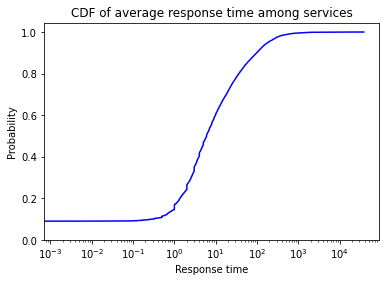

In [317]:
xs = sorted(df_calls_interface['avgRT'])
unique, counts = np.unique(xs, return_counts=True)
pdf = [c / len(xs) for c in counts]
cdf = [x for x in np.cumsum(pdf)]

plt.plot(unique, cdf, color="blue", label='')
plt.xlabel('Response time')
plt.ylabel('Probability')
plt.title('CDF of average response time among services')
plt.xscale('log')
# plt.xlim(0)
plt.ylim(0)

In [318]:
calls_group_um = df_calls_interface.groupby('um')['count'].sum()
call_probability = [row['count'] / calls_group_um[row['um']] for index, row in df_calls_interface.iterrows()]
df_calls_interface['probability'] = call_probability


(0.0, 1.0499945991678405)

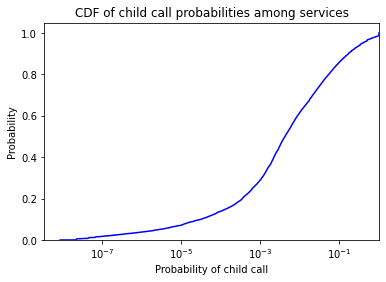

In [319]:
xs = sorted(df_calls['probability'])
unique, counts = np.unique(xs, return_counts=True)
pdf = [c / len(xs) for c in counts]
cdf = [x for x in np.cumsum(pdf)]

plt.plot(unique, cdf, color="blue", label='')
plt.xlabel('Probability of child call')
plt.ylabel('Probability')
plt.title('CDF of child call probabilities among services')
plt.xscale('log')
plt.xlim(right=1)
plt.ylim(0)

In [14]:
path = 'clusterdata_traces_0'
file_names = [f for f in listdir(path)[:10] if isfile(join(path, f))]

trace_df = []

for f in file_names:
    df = pd.read_csv(join(path, f))
    trace_df += [df['traceid'], int]

traces = pd.concat(trace_df, axis=0, ignore_index=True)


In [15]:
print(df_trace.groupby('um')['rt'].mean())

um
(?)                                                                -82.000000
4dd620e520ac12d81d17e010ef3997bd0e6abce62b1308e6c9ef1ec23589ce7b     1.333333
6f83eed1237572824fa0807fb2414de831c989c6392cca51f3364b655804153b     8.100000
a72b198ffd0c48db90ecc639aa6cb01edd23b1fc6b519a8c998b645b85d8b7bc     0.625000
af42b5e3e0eb334d38619733586d78d1414f6549f24d31b39a5294454638bc59     0.400000
Name: rt, dtype: float64


In [16]:
print(traces.groupby('um')['rt'].mean())

um
(?)                                                                -48.727273
0696938ae3212896c34626b3816d92ca5b0bed0cfda981adc7710d5dae189b6e     0.000000
0993061afc84936e8e92508c7a754eb34c86c47042c802d68f06e25627c3fd53    -3.000000
20119b0b7869f98acb0f0f7557893474a7b84c34e50ec6dcc6d3afb953758f12     1.000000
2387b3f417ee8dc3dcd4f6f9572b6552b704b395290f7773ef87d96ac6bfe0b0     1.000000
2570251327898f466842f2f0e985879d0cd223d3f9409c2a426e512df5290d2a    28.000000
3b40e01c9ae51f80a0ec895ca16c9b9a89da1f81ea192bd7207fd3f3909e2413     1.500000
3dd6faf7046dcc9eda91fc9a83b4b650abf5bf729a9d89beed7f467dc685a6c6     0.666667
4ab265f54516248ee8873be7d6441912456ce17e84f39918e01ddc4210e56da5     0.603550
4dd620e520ac12d81d17e010ef3997bd0e6abce62b1308e6c9ef1ec23589ce7b     0.705882
51b03816f3c956aa21d5f33d36ebf8f918c1fc4eda169d90dba535b3eb00adaa     1.000000
530a42c55ed7f9999e26fb2b97a2c53d593cda13c20965e6f43b37167c6c7715     0.500000
5e5dac309827db024dac61af6d049e07d53538929a3526a56a1d3705f234c